## Green Belt - Lista de Exercícios 2  
### Gráfico de Controle e Capabilidade

1 - Uma empresa acompanha o seu volume financeiro em estoque para avaliar se o 
departamento de Planejamento e Controle da Produção está fazendo corretamente o seu 
trabalho. Todo mês, um inventário é realizado e o valor total do estoque é anotado. A empresa 
quer saber se, em algum dos meses, o volume financeiro de estoque foi maior ou menor do que 
ele costuma ser, pois o Gerente de PCP diz que está fazendo vários projetos para a redução do 
valor em estoque.  

Baseado neste cenário, temos que entender se o valor de estoque está sob controle estatístico, 
indicando um processo estável. Caso ele esteja, significa que as medidas tomadas pelo gerente 
não estão surtindo efeito. A ferramenta que nos dará esta resposta é o Gráfico de Controle do 
valor inventariado. 

Os dados estão na planilha Green_Belt_FM2S_Lista_Exercícios_02, na aba 
01.Estoque.

### Importação dos dados

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Green_Belt/2-Measure/Exercicios/Lista_2/base_dados/Estoque.csv'
df = pd.read_csv(url)

df.head()

,Mês,Inventário
0,jan./2003,19
1,fev./2003,27
2,mar./2003,20
3,abr./2003,16
4,mai./2003,18


### Responda:

a) Qual tipo de variável é o valor (medido em milhares de reais)? É uma variável de 
contagem, classificação ou contínua? 

R: O valor do inventário (em milhares de reais) é uma variável contínua, pois pode assumir qualquer valor dentro de um intervalo (ex: R$ 19.500, R$ 27.200, etc.).

b) Como o dado foi coletado e é apresentado? Qual é o eixo X do gráfico de controle? 
Quantas medidas de valor temos por unidade de tempo (em outras palavras, qual é o 
tamanho do subgrupo?) 

In [4]:
print(f"Número de medições: {len(df)}")
print(f"Subgrupos: {df['Mês'].nunique()} (1 medição/mês)")

Número de medições: 31
Subgrupos: 31 (1 medição/mês)


c) Qual é o gráfico de controle mais adequado para analisar estes dados?

R: Como temos dados contínuos com subgrupos de tamanho 1, o gráfico recomendado é a Carta I-MR (Individual-Moving Range).

d) Lembre-se que o gráfico de controle só pode ser usado se os dados obtidos puderem 
ser aproximados por distribuições específicas (Normal para dados contínuos, Poisson 
para dados de contagem e Binomial para dados categóricos). Avalie se a variável “valor” 
é aproximável por uma distribuição normal.

R: Podemos usar o teste de Shapiro-Wilk e um histograma:

Valor-p: 0.0562
Normal
Estatística do teste: 0.9339
Valor médio do inventário: 20.39 mil reais


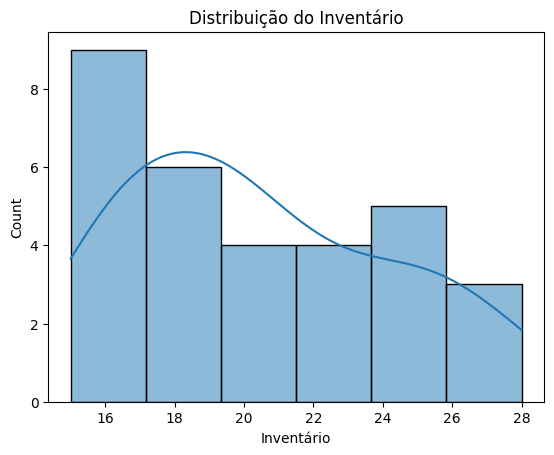

In [5]:
from scipy.stats import shapiro

# Teste de normalidade
stat, p_valor = shapiro(df['Inventário'])
print(f"Valor-p: {p_valor:.4f}")
print("Normal" if p_valor > 0.05 else "Não normal")
print(f"Estatística do teste: {stat:.4f}")
print(f"Valor médio do inventário: {df['Inventário'].mean():.2f} mil reais")

# Histograma
sns.histplot(df['Inventário'], kde=True)
plt.title("Distribuição do Inventário")
plt.show()

e) Trace o gráfico de controle mais adequado. Os gráficos de controle ficam na aba “Estat 
→ Cartas de Controle” do Minitab. O gráfico de Individuais encontra-se no submenu 
“Cartas de Variáveis para Dados Individuais”, os gráficos P e U encontram-se no 
submenu “Cartas de Atributos” e o gráfico X-Barra S encontra-se no submenu “Cartas 
de Variáveis para Subgrupos”. Lembre-se de escolher a variável correta para plotar e de 
ajustar a escala! 

R: Como não temos subgrupos, usamos a Carta de Individuais (I) e a Amplitude Móvel (MR):

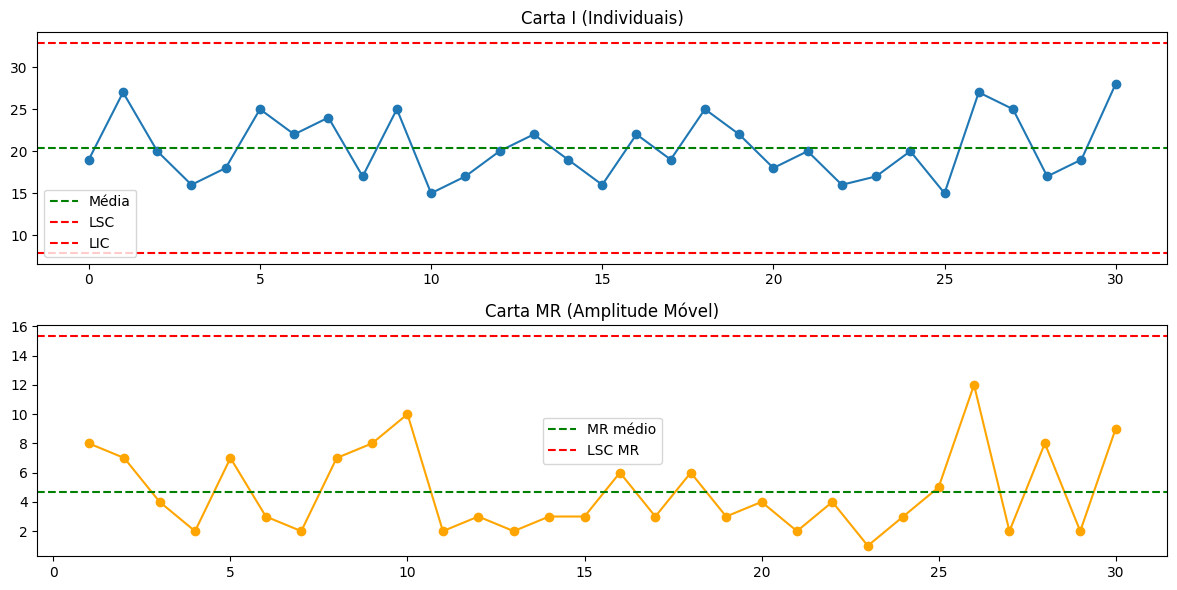

In [6]:
def carta_controle_I_MR(dados, coluna):
    # Cálculo dos limites
    media = dados[coluna].mean()
    mr = np.abs(dados[coluna].diff().dropna())
    amr = mr.mean()
    lsc_i = media + 2.66 * amr
    lic_i = media - 2.66 * amr
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(dados[coluna], marker='o')
    plt.axhline(media, color='g', linestyle='--', label='Média')
    plt.axhline(lsc_i, color='r', linestyle='--', label='LSC')
    plt.axhline(lic_i, color='r', linestyle='--', label='LIC')
    plt.title("Carta I (Individuais)")
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(mr, marker='o', color='orange')
    plt.axhline(amr, color='g', linestyle='--', label='MR médio')
    plt.axhline(3.27 * amr, color='r', linestyle='--', label='LSC MR')
    plt.title("Carta MR (Amplitude Móvel)")
    plt.legend()
    plt.tight_layout()
    plt.show()

carta_controle_I_MR(df, 'Inventário')

f) Analise o gráfico. Existem causas especiais? 

Regra 1: Pontos fora dos limites (LIC/LSC).

Regra 2: Tendências ou padrões não aleatórios.

No gráfico gerado, verifique se há pontos fora dos limites vermelhos ou sequências acima/abaixo da média

g) O que pode ser dito das ações do Gerente?

R: Se o processo estiver sob controle estatístico (sem causas especiais), as ações do gerente não estão impactando significativamente o estoque. Se houver causas especiais, pode indicar efeito de intervenções.

h) Você sabia que existe outro caminho para fazer este gráfico? Vá em “Assistente” e 
selecione a opção “Cartas de Controle…”. Use a árvore (você pode clicar nos pontos de 
decisão se precisar de ajuda) para selecionar o gráfico. Use o formato proposto. Trace 
novamente o gráfico.

R: O "Assistente" do Minitab guia a escolha do gráfico com base nas características dos dados. Em Python, usamos a função carta_controle_I_MR acima para replicar a lógica.

i) Analise cuidadosamente cada tela. O que cada uma diz? 

R:

1. Seleção de Dados: Escolha da coluna Inventário.

2. Tipo de Gráfico: Carta I-MR automática.

3. Limites: Calculados com base na amplitude móvel (2.66 * AMR).

4. Testes Especiais: Verificação de violações de regras (ex: 8 pontos consecutivos acima da média).

2) Vamos continuar analisando os mesmos dados. O pessoal do financeiro ficou muito triste que 
o  Gerente  de  PCP  não  estava  conseguindo  diminuir  o  valor  do  inventário.  Para  motivá-lo, 
atrelaram uma meta para o valor de inventário. Ele não poderia ficar acima de 18 mil reais. Se o 
Gerente  de  PCP  excedesse  essa  meta  por  um  mês,  ele  não  iria  receber  seu  bônus.  As  coisas 
teriam que mudar, pois cada mês sem bônus, significaria, na prática, metade do seu pagamento. 
Um pouco preocupado com a situação, o Gerente resolve fazer uma análise de capabilidade para 
analisar quanto ele ia deixar de ganhar no ano. 
Ainda usando os mesmos dados, responda: 

1. Trace uma análise de capabilidade. Essa análise está em “Estat → Ferramentas  da 
Qualidade → Capability Six Pack”. Escolha a distribuição de dados mais adequada para 
os seus dados (valor de inventário). Trace a análise. Lembre-se que aqui a especificação 
é estar sempre abaixo de 18.000! 
2. Quantos meses no ano o Gerente iria ficar sem o seu bônus? 

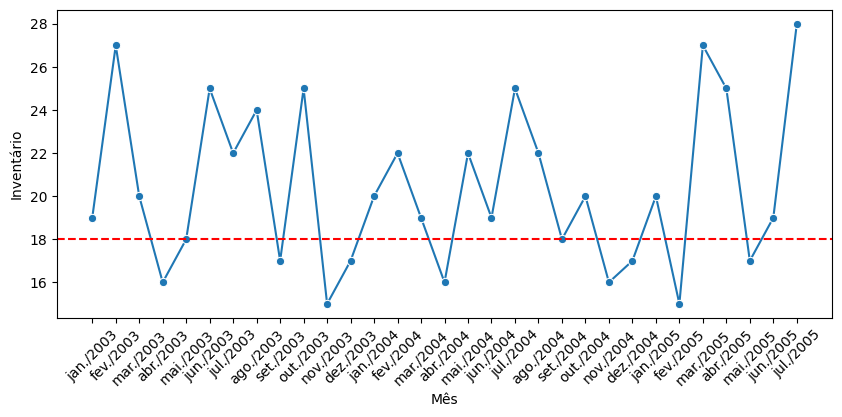

In [7]:
# Análise de Capabilidade com DataFrame existente
lse = 18  # Limite Superior

# 1. Gráficos e análises usando df existente
plt.figure(figsize=(10, 4))
sns.lineplot(x='Mês', y='Inventário', data=df, marker='o')
plt.axhline(lse, color='r', linestyle='--')
plt.xticks(rotation=45)
plt.show()

# 2. Métricas de capabilidade
media = df['Inventário'].mean()
desvio = df['Inventário'].std()

In [13]:
# Visualização inicial dos dados
print(df.head())
print(df.info())

# Estatísticas básicas
print(df.describe())

         Mês  Inventário   Ano  Sem_Bônus
0  jan./2003          19  2003       True
1  fev./2003          27  2003       True
2  mar./2003          20  2003       True
3  abr./2003          16  2003      False
4  mai./2003          18  2003      False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Mês         31 non-null     object
 1   Inventário  31 non-null     int64 
 2   Ano         31 non-null     object
 3   Sem_Bônus   31 non-null     bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 907.0+ bytes
None
       Inventário
count   31.000000
mean    20.387097
std      3.809439
min     15.000000
25%     17.000000
50%     20.000000
75%     23.000000
max     28.000000



=== Análise de Capabilidade ===
Média: 20.39
Desvio padrão: 3.81
CPU: -0.21
Probabilidade de exceder: 73.5%
Meses sem bônus: 20/31

=== Resumo Anual ===
 Ano  Meses_sem_bônus  Meses_totais  Inventário_médio  %_sem_bônus  Desvio_padrão
2003                7            12         20.416667         58.3       4.055486
2004                8            12         19.666667         66.7       2.741378
2005                5             7         21.571429         71.4       5.094348


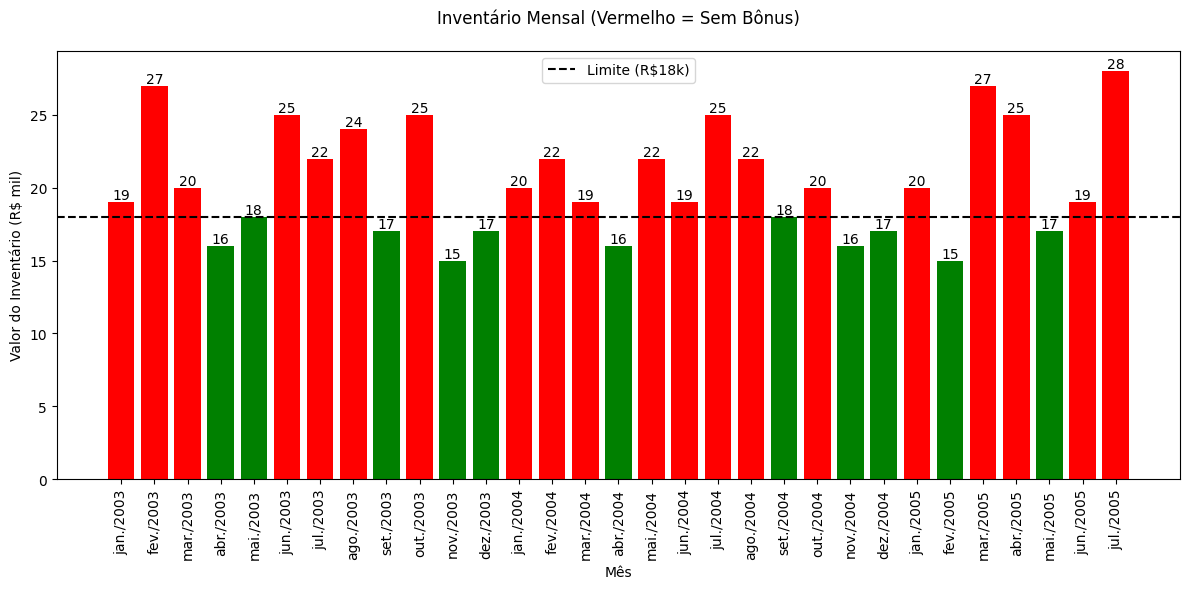

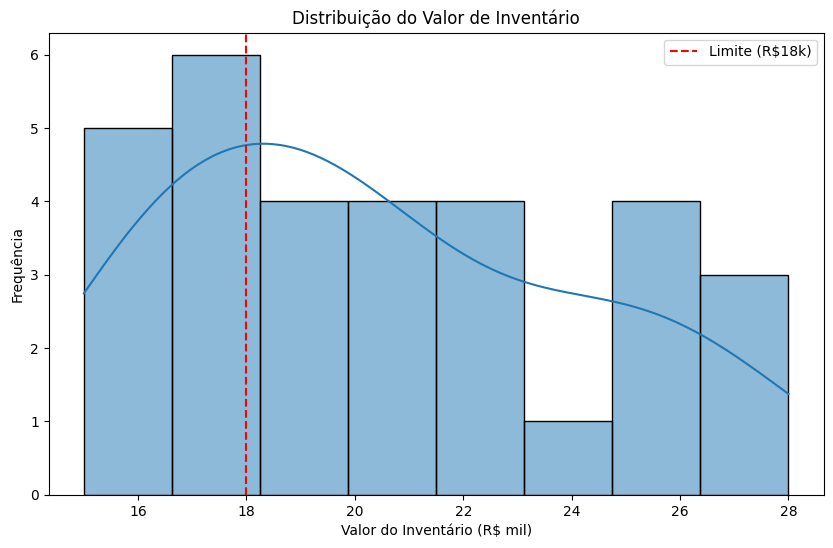

In [ ]:
class AnaliseInventario:
    def __init__(self, df, limite=18):
        self.df = df.copy()
        self.limite = limite
        self._preprocessar()
        
    def _preprocessar(self):
        """Prepara os dados para análise"""
        # Garantir que temos a coluna de ano e sem_bônus
        if 'Ano' not in self.df.columns:
            self.df['Ano'] = self.df['Mês'].str.extract(r'(\d{4})')
        if 'Sem_Bônus' not in self.df.columns:
            self.df['Sem_Bônus'] = self.df['Inventário'] > self.limite
        
    def analise_capabilidade(self):
        """Realiza análise completa de capabilidade"""
        media = self.df['Inventário'].mean()
        desvio = self.df['Inventário'].std(ddof=1)
        
        # Cálculos de capabilidade (considerando apenas LSE)
        cpu = (self.limite - media) / (3 * desvio)
        ppk = cpu  # Como só temos LSE, PPK = CPU
        z_score = (self.limite - media) / desvio
        prob_exceder = 1 - stats.norm.cdf(z_score)
        
        return {
            'média': media,
            'desvio_padrão': desvio,
            'cpu': cpu,
            'ppk': ppk,
            'probabilidade_exceder': prob_exceder,
            'meses_sem_bonus': self.df['Sem_Bônus'].sum(),
            'total_meses': len(self.df)
        }
    
    def plot_series_temporais(self):
        """Gráfico de séries temporais com destaque para meses problemáticos"""
        plt.figure(figsize=(12, 6))
        
        # Criar paleta de cores
        cores = ['red' if x else 'green' for x in self.df['Sem_Bônus']]
        
        # Gráfico de barras
        bars = plt.bar(range(len(self.df)), self.df['Inventário'], color=cores)
        
        # Linha de limite
        plt.axhline(self.limite, color='black', linestyle='--', label=f'Limite (R${self.limite}k)')
        
        # Configurações do gráfico
        plt.title('Inventário Mensal (Vermelho = Sem Bônus)', pad=20)
        plt.xlabel('Mês')
        plt.ylabel('Valor do Inventário (R$ mil)')
        plt.xticks(range(len(self.df)), self.df['Mês'], rotation=90)
        plt.legend()
        
        # Adicionar valores nas barras
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.0f}',
                    ha='center', va='bottom')
        
        plt.tight_layout()
        return plt
    
    def resumo_anual(self):
        """Gera resumo agregado por ano"""
        resumo = self.df.groupby('Ano').agg(
            Meses_sem_bônus=('Sem_Bônus', 'sum'),
            Meses_totais=('Sem_Bônus', 'count'),
            Inventário_médio=('Inventário', 'mean')
        ).reset_index()
        
        resumo['%_sem_bônus'] = (resumo['Meses_sem_bônus'] / resumo['Meses_totais'] * 100).round(1)
        resumo['Desvio_padrão'] = self.df.groupby('Ano')['Inventário'].std().values
        
        return resumo
    
    def plot_distribuicao(self):
        """Mostra a distribuição dos valores de inventário"""
        plt.figure(figsize=(10, 6))
        
        sns.histplot(self.df['Inventário'], kde=True, bins=8)
        plt.axvline(self.limite, color='red', linestyle='--', label=f'Limite (R${self.limite}k)')
        
        plt.title('Distribuição do Valor de Inventário')
        plt.xlabel('Valor do Inventário (R$ mil)')
        plt.ylabel('Frequência')
        plt.legend()
        
        return plt

# Exemplo de uso:
if __name__ == "__main__":
    # Seus dados (já pré-processados)
    data = {
        'Mês': ['jan./2003', 'fev./2003', 'mar./2003', 'abr./2003', 'mai./2003', 'jun./2003', 
                'jul./2003', 'ago./2003', 'set./2003', 'out./2003', 'nov./2003', 'dez./2003',
                'jan./2004', 'fev./2004', 'mar./2004', 'abr./2004', 'mai./2004', 'jun./2004',
                'jul./2004', 'ago./2004', 'set./2004', 'out./2004', 'nov./2004', 'dez./2004',
                'jan./2005', 'fev./2005', 'mar./2005', 'abr./2005', 'mai./2005', 'jun./2005', 'jul./2005'],
        'Inventário': [19, 27, 20, 16, 18, 25, 22, 24, 17, 25, 15, 17, 
                       20, 22, 19, 16, 22, 19, 25, 22, 18, 20, 16, 17,
                       20, 15, 27, 25, 17, 19, 28]
    }
    
    df = pd.DataFrame(data)
    analise = AnaliseInventario(df, limite=18)
    
    # 1. Análise de capabilidade
    capabilidade = analise.analise_capabilidade()
    print("\n=== Análise de Capabilidade ===")
    print(f"Média: {capabilidade['média']:.2f}")
    print(f"Desvio padrão: {capabilidade['desvio_padrão']:.2f}")
    print(f"CPU: {capabilidade['cpu']:.2f}")
    print(f"Probabilidade de exceder: {capabilidade['probabilidade_exceder']*100:.1f}%")
    print(f"Meses sem bônus: {capabilidade['meses_sem_bonus']}/{capabilidade['total_meses']}")
    
    # 2. Resumo anual
    print("\n=== Resumo Anual ===")
    print(analise.resumo_anual().to_string(index=False))
    
    # 3. Visualizações
    analise.plot_series_temporais().show()
    analise.plot_distribuicao().show()